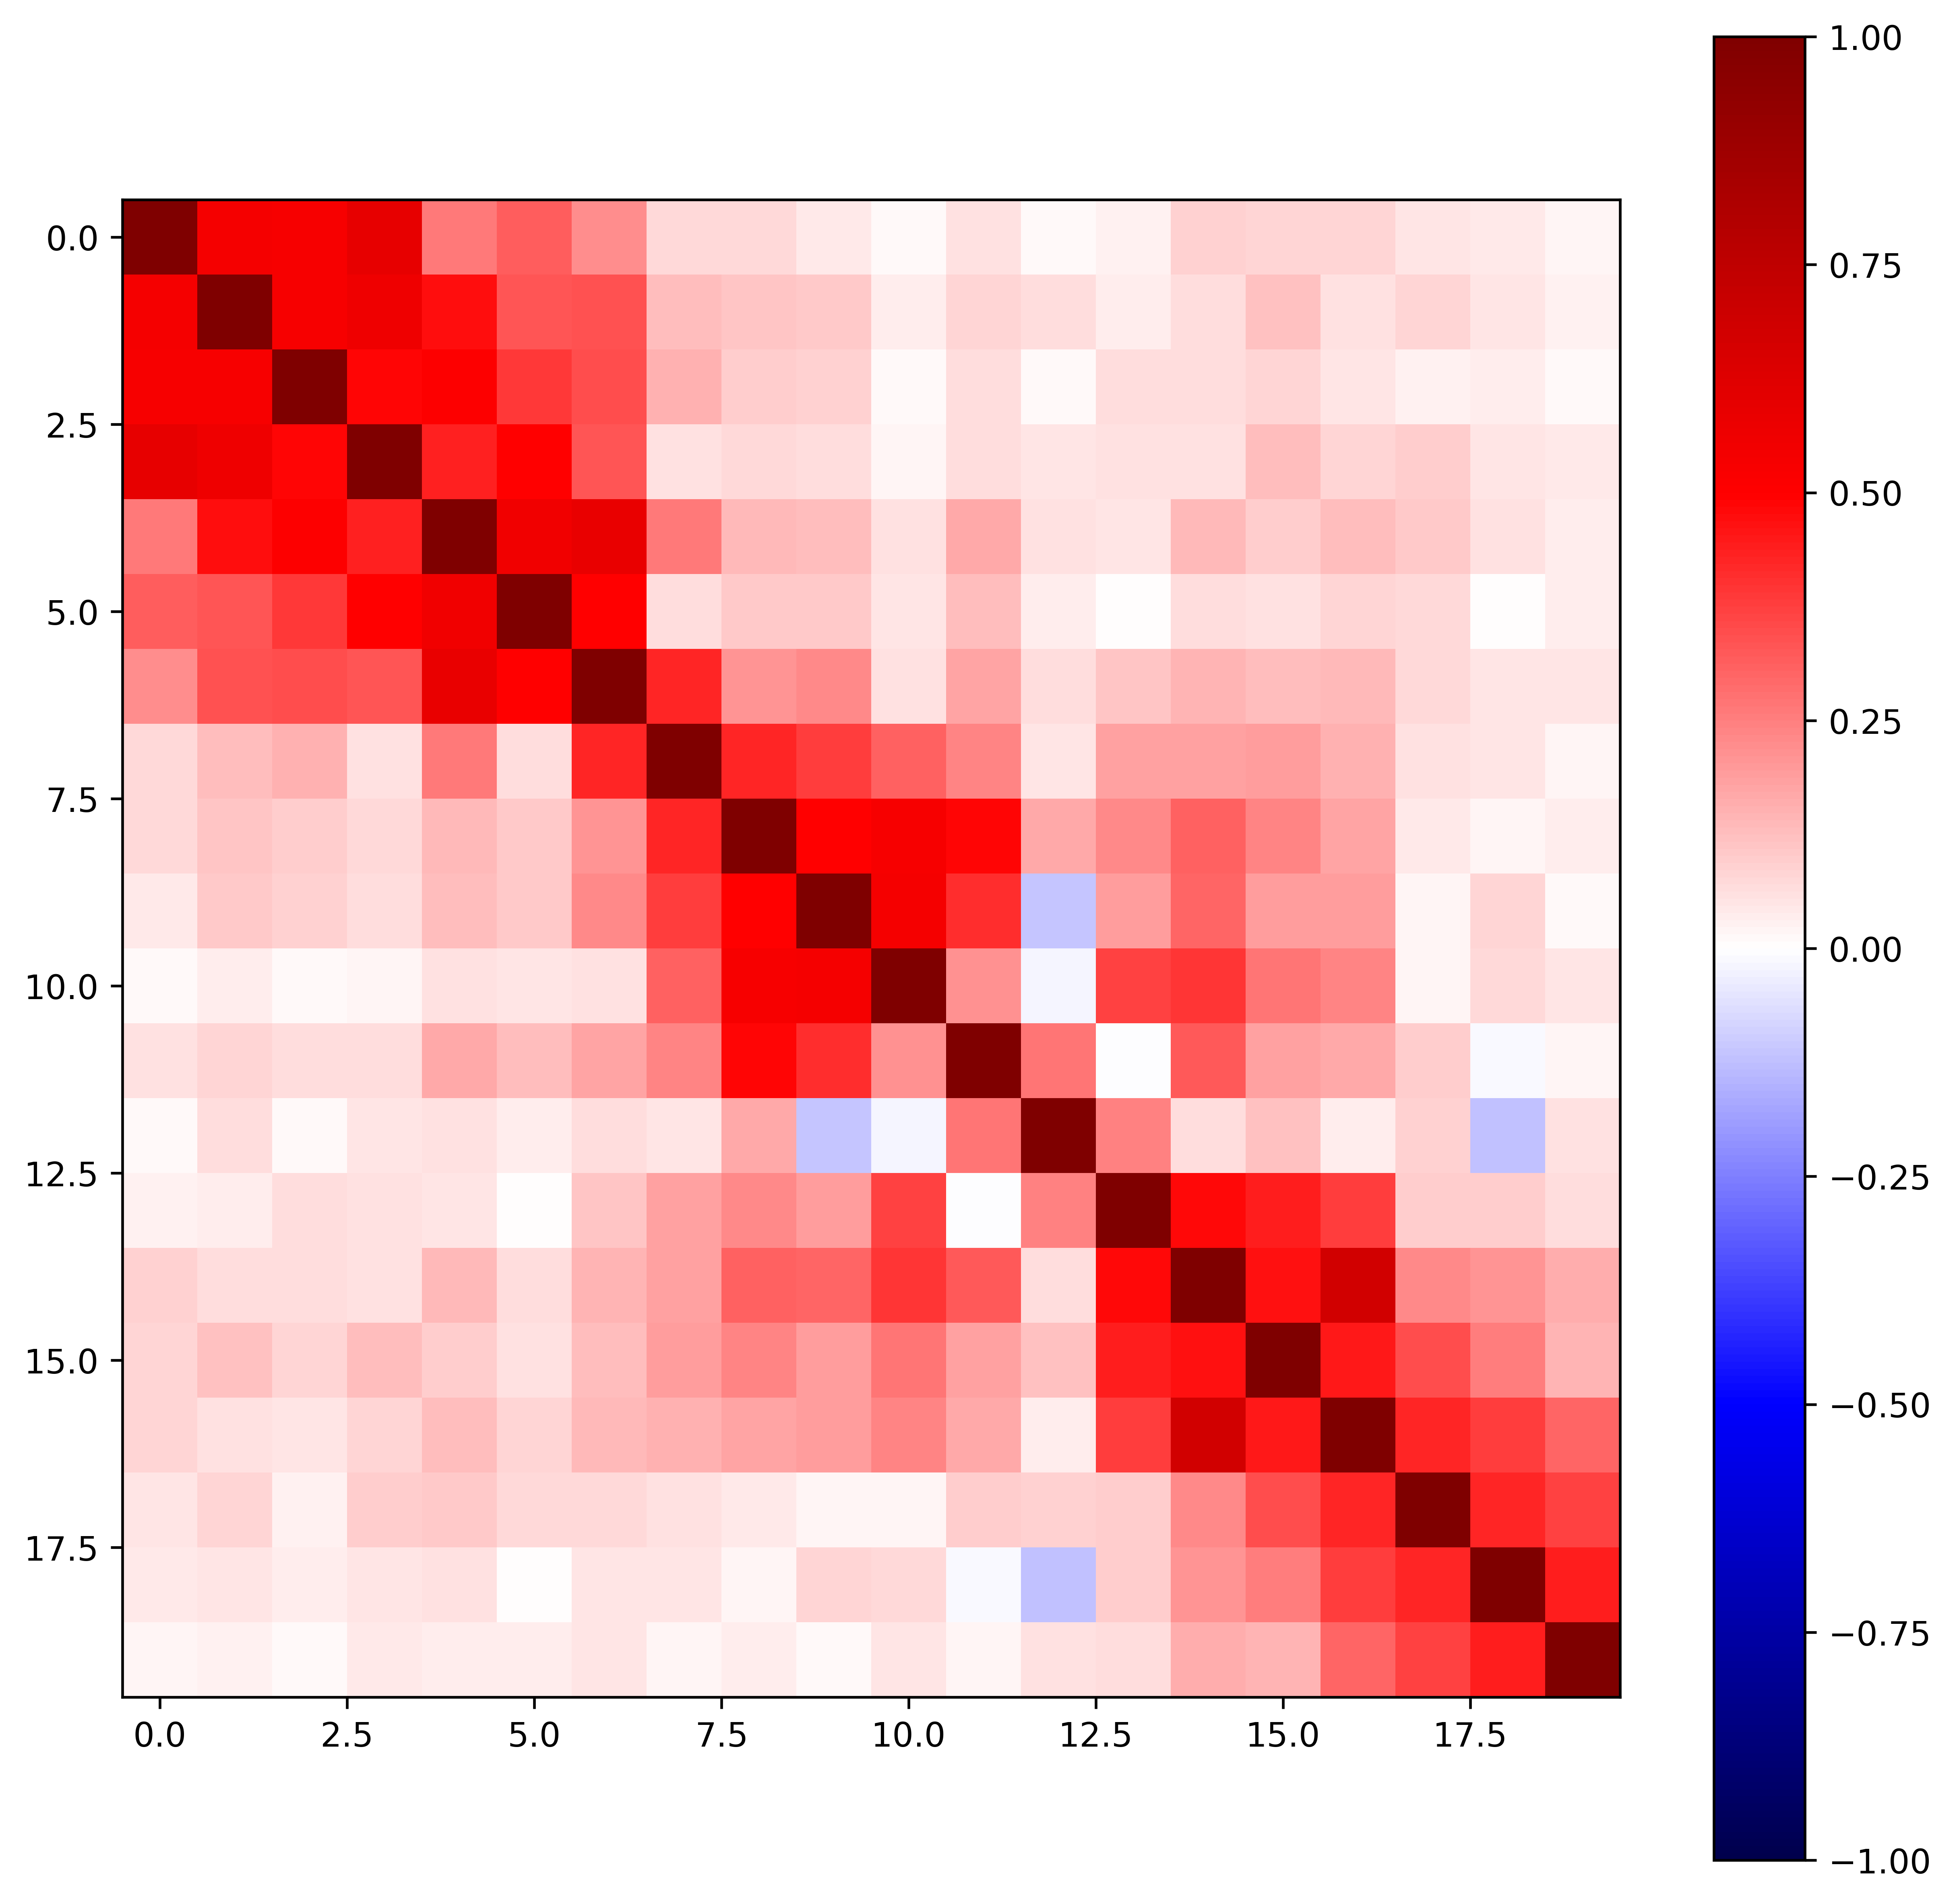

In [11]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

groFILE = '/media/osollila/Data1/LRAE/LRAE_in_water_310K_amber03_helical/LRAE_in_water_310K_amber03_helicalSKIPnojumpPROTEIN.gro'
trjFILE = '/media/osollila/Data1/LRAE/LRAE_in_water_310K_amber03_helical/LRAE_in_water_310K_amber03_helicalPROTEINstart800nsNOJUMP.xtc'
outfile = '../Figures/LRAEcorrelationHELICALstart.png'


u = mda.Universe(groFILE, trjFILE)
CAatoms = u.select_atoms("name CA")
vec=[]
matrix=np.empty((len(CAatoms.ix)-1,len(CAatoms.ix)-1))
for i in range(len(CAatoms.ix)-1):
    vec.append(0)
for i in range(len(vec)):
    for j in range(len(vec)):
        matrix[i,j]=0
#print('',matrix)
for frame in u.trajectory:
    for i in range(len(CAatoms.ix)-1):
        vec[i]=CAatoms[i+1].position-CAatoms[i].position
        vec[i]=vec[i]/np.sqrt(np.dot(vec[i],vec[i]))
    for i in range(len(vec)):
        for j in range(len(vec)):
            matrix[i,j]=matrix[i,j]+np.dot(vec[i],vec[j])
            #print('',i,j,matrix[i,j])
for i in range(len(vec)):
    for j in range(len(vec)):
        matrix[i,j]=matrix[i,j]/len(u.trajectory)
#print('The result is: {}',matrix)

w = 10
h = 10
d = 600
plt.figure(figsize=(w, h), dpi=d)
#myFile=np.genfromtxt('result.csv', delimiter=',')

color_map = plt.imshow(matrix,vmin=-1, vmax=1)
color_map.set_cmap("seismic")
plt.colorbar()
plt.savefig(outfile)

